In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Data_Negara_HELP.csv')
df.tail()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
Negara              167 non-null object
Kematian_anak       167 non-null float64
Ekspor              167 non-null float64
Kesehatan           167 non-null float64
Impor               167 non-null float64
Pendapatan          167 non-null int64
Inflasi             167 non-null float64
Harapan_hidup       167 non-null float64
Jumlah_fertiliti    167 non-null float64
GDPperkapita        167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
NAN = [(col,df[col].isna().sum()) for col in df]
NAN = pd.DataFrame(NAN, columns=['Column_Name', 'Num_of_NaN'])
NAN

,Column_Name,Num_of_NaN
0,Negara,0
1,Kematian_anak,0
2,Ekspor,0
3,Kesehatan,0
4,Impor,0
5,Pendapatan,0
6,Inflasi,0
7,Harapan_hidup,0
8,Jumlah_fertiliti,0
9,GDPperkapita,0


In [7]:
NUL = [(col,df[col].isnull().sum()) for col in df]
NUL = pd.DataFrame(NUL, columns=['Column_Name', 'Num_of_NUL'])
NUL

,Column_Name,Num_of_NUL
0,Negara,0
1,Kematian_anak,0
2,Ekspor,0
3,Kesehatan,0
4,Impor,0
5,Pendapatan,0
6,Inflasi,0
7,Harapan_hidup,0
8,Jumlah_fertiliti,0
9,GDPperkapita,0


In [8]:
def upper_lower_bound(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1
    LB = q1 - (iqr* 1.5)
    UB = q3 + (iqr* 1.5)
    return LB, UB

In [9]:
def get_outlier(x):
    lower_bound, upper_bound = upper_lower_bound(x)
    return x[np.where((x > upper_bound)| (x < lower_bound))]
print('Outlier kematian anak: ', get_outlier(df['Kematian_anak'].values))
print('Outlier Ekspor: ',get_outlier(df['Ekspor'].values))
print('Outlier Kesehatan: ',get_outlier(df['Kesehatan'].values))
print('Outlier Impor: ',get_outlier(df['Impor'].values))
print('Outlier Pendapatan: ',get_outlier(df['Pendapatan'].values))
print('Outlier Inflasi: ',get_outlier(df['Inflasi'].values))
print('Outlier Harapan Hidup: ',get_outlier(df['Harapan_hidup'].values))
print('Outlier Jumlah Fertiliti: ',get_outlier(df['Jumlah_fertiliti'].values))
print('Outlier GDPperkapita: ',get_outlier(df['GDPperkapita'].values))

Outlier kematian anak:  [149. 150. 208. 160.]
Outlier Ekspor:  [103.  175.  153.   93.8 200. ]
Outlier Kesehatan:  [14.2 17.9]
Outlier Impor:  [142. 154. 108. 174.]
Outlier Pendapatan:  [ 80600  75200  91700  62300 125000  72100  55500  57600]
Outlier Inflasi:  [ 24.9  39.2 104.   26.5  45.9]
Outlier Harapan Hidup:  [47.5 32.1 46.5]
Outlier Jumlah Fertiliti:  [7.49]
Outlier GDPperkapita:  [ 51900  46900  44400  35300  47400  58000  46200  40600  41800  41900
  48700  35800  44500  38500 105000  50300  33700  87800  70300  46600
  52100  74600  35000  38900  48400]


In [10]:
def remove_outlier(df1):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3-Q1
    df_final = df[~((df1<(Q1 -1.5*IQR)) | (df>(Q3 + 1.5*IQR)))]
    return df_final
df2 = remove_outlier(df[['Kematian_anak', 'Ekspor', 'Kesehatan','Impor','Pendapatan','Inflasi','Harapan_hidup','Jumlah_fertiliti','GDPperkapita']])
df2.dropna(axis = 0, inplace = True)

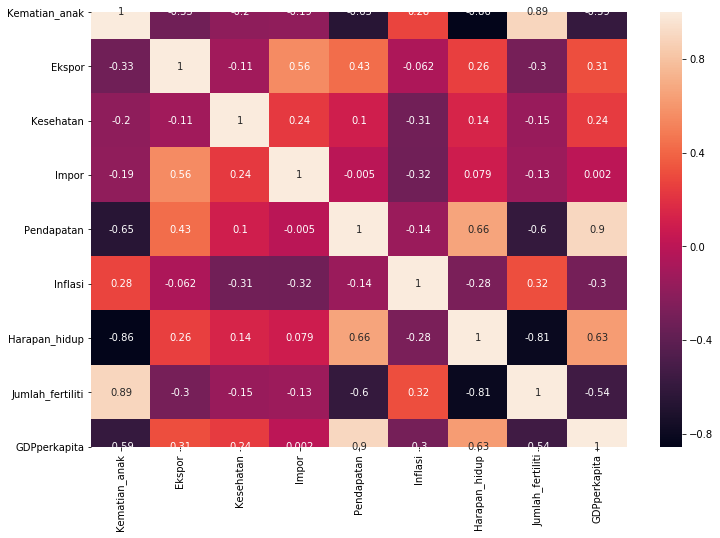

In [11]:
df_corr = df2
fig, ax = plt.subplots(1, 1, figsize = (12,8))
sns.heatmap(df_corr.corr(), annot = True)
plt.show()

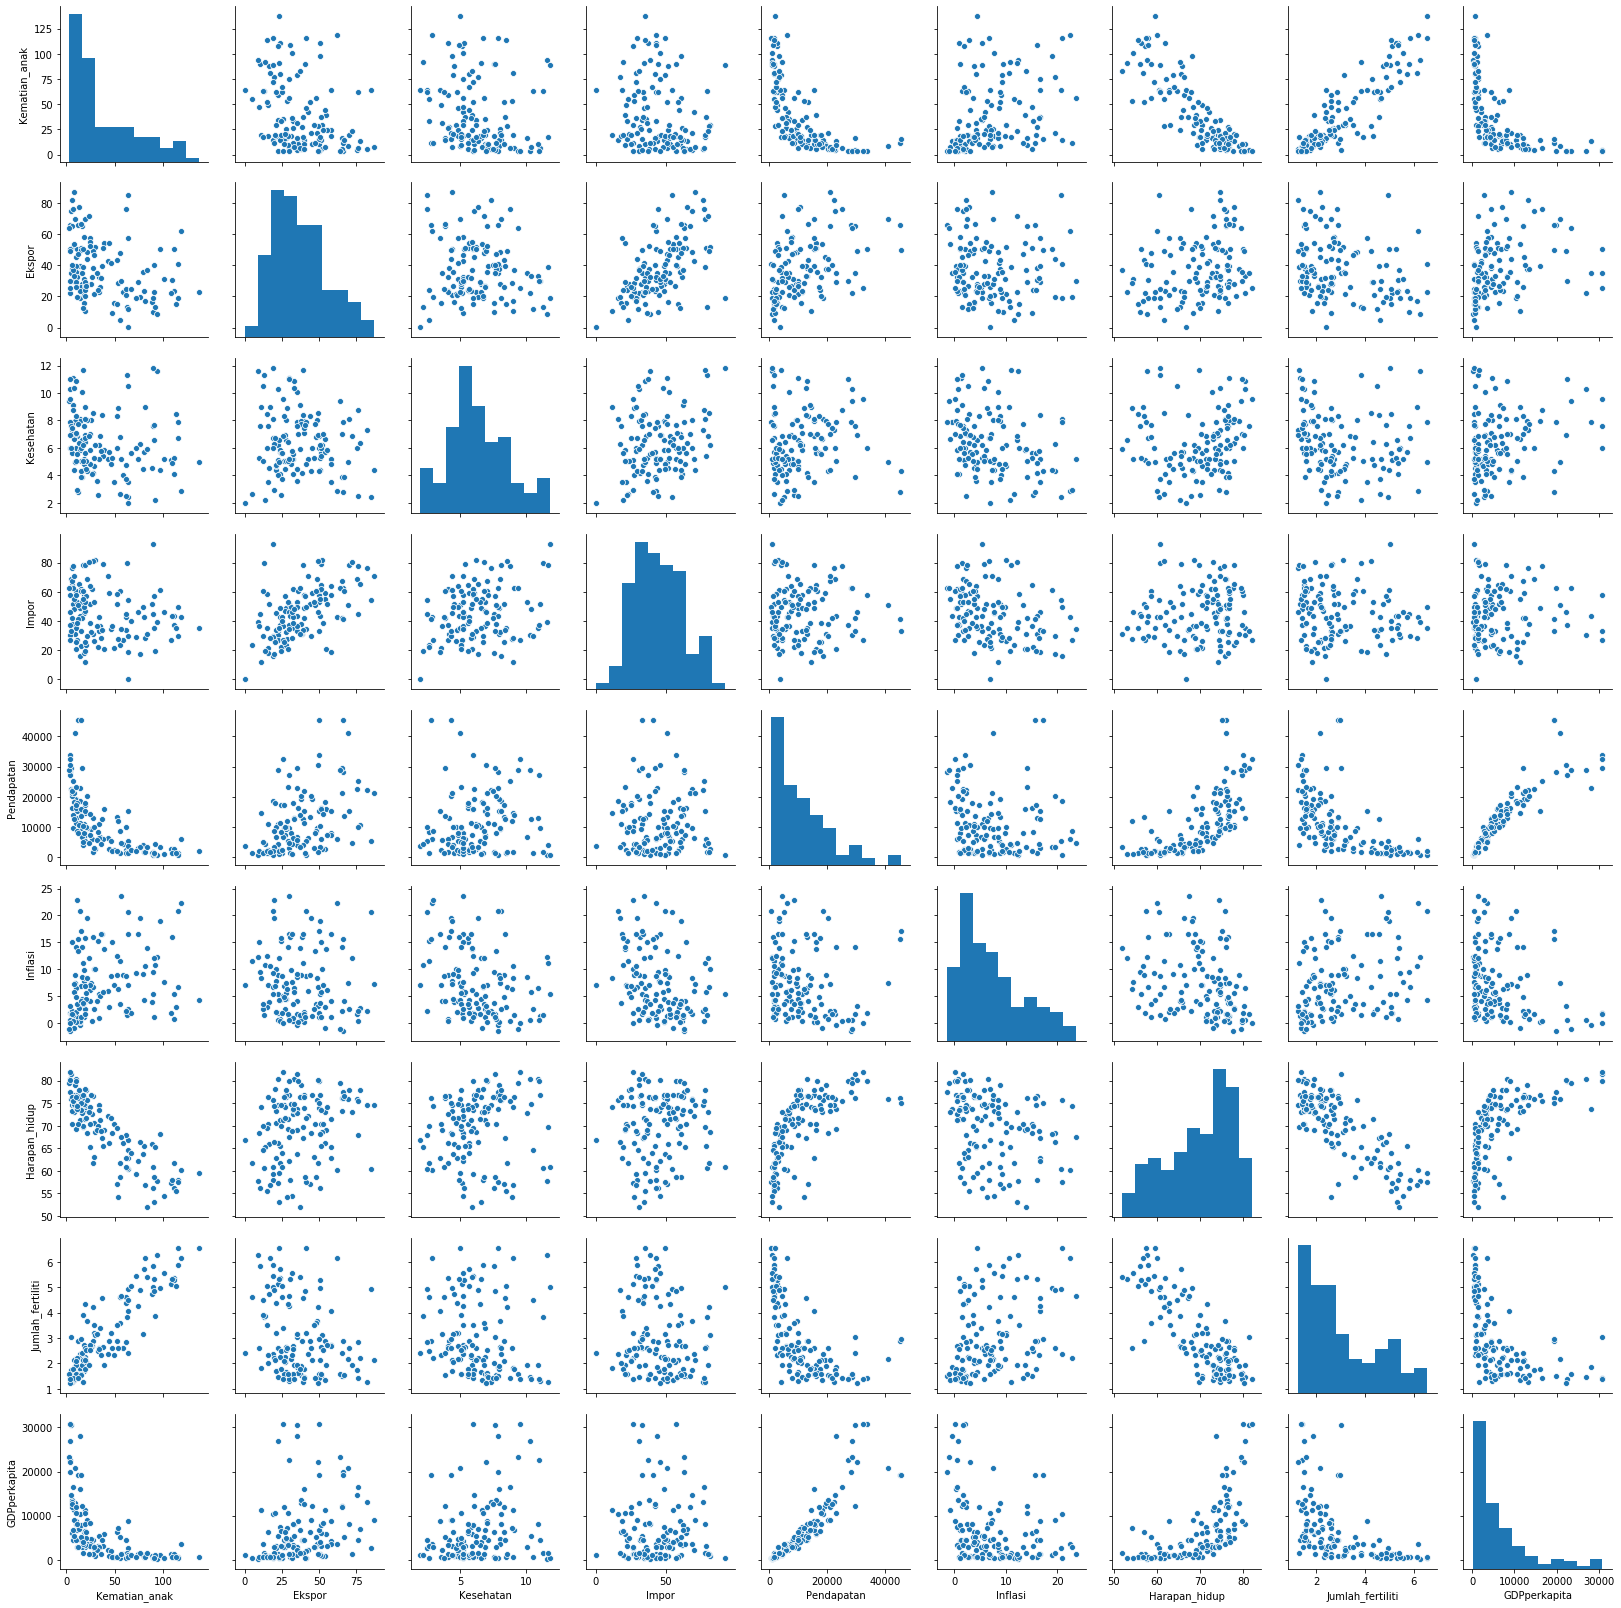

In [12]:
sns.pairplot(df2)
plt.show()

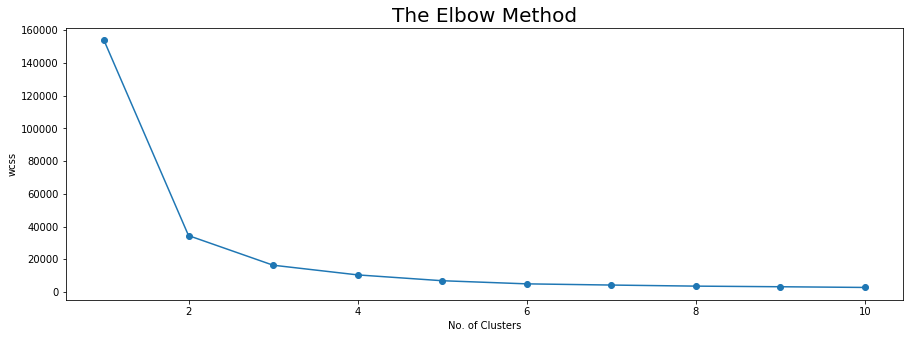

In [13]:
# clustering the samples based on health factors(child_mort, life_expec, total_fer)
df_clustering_1 = df2[['Kematian_anak', 'Harapan_hidup', 'Jumlah_fertiliti']]
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    km.fit(df_clustering_1)
    wcss.append(km.inertia_)
    
plt.figure(figsize=(15,5))
plt.plot(range(1, 11), wcss, 'o-')
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [14]:
kmeans = KMeans(n_clusters=3)
model = kmeans.fit(df_clustering_1)
pred = model.labels_
df2['cluster'] = pred
df2.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,1


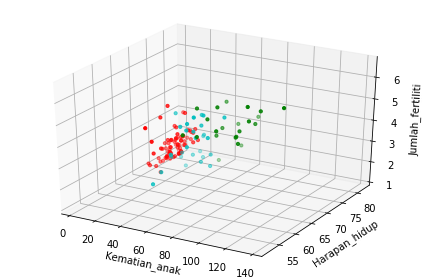

In [15]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
cluster_0 = df2.query('cluster==0')
cluster_1 = df2.query('cluster==1')
cluster_2 = df2.query('cluster==2')
plt_0 = ax.scatter(cluster_0['Kematian_anak'], cluster_0['Harapan_hidup'], cluster_0['Jumlah_fertiliti'], c='c', s=10)
plt_1 = ax.scatter(cluster_1['Kematian_anak'], cluster_1['Harapan_hidup'], cluster_1['Jumlah_fertiliti'], c='r', s=10)
plt_2 = ax.scatter(cluster_2['Kematian_anak'], cluster_2['Harapan_hidup'], cluster_2['Jumlah_fertiliti'], c='g', s=10)
ax.set_xlabel('Kematian_anak')
ax.set_ylabel('Harapan_hidup')
ax.set_zlabel('Jumlah_fertiliti')
plt.tight_layout()
plt.show()

In [16]:
print(cluster_2.count())

Negara              22
Kematian_anak       22
Ekspor              22
Kesehatan           22
Impor               22
Pendapatan          22
Inflasi             22
Harapan_hidup       22
Jumlah_fertiliti    22
GDPperkapita        22
cluster             22
dtype: int64


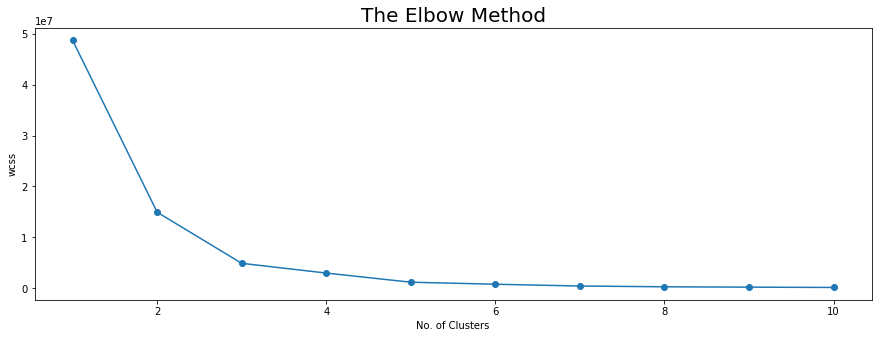

In [17]:
# clustering the samples based on economic factors(child_mort, life_expec, total_fer)
df_clustering_2 = cluster_2[['Pendapatan', 'GDPperkapita', 'Kesehatan']]
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    km.fit(df_clustering_2)
    wcss.append(km.inertia_)
    
plt.figure(figsize=(15,5))
plt.plot(range(1, 11), wcss, 'o-')
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [22]:
kmeans = KMeans(n_clusters=3)
model = kmeans.fit(df_clustering_2)
pred_2 = model.labels_
cluster_2['cluster'] = pred_2
cluster_2.head()

C:\Users\stheven erlangga\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,cluster
0,Afghanistan,90.2,10.00,7.58,44.9,1610.0,9.440,56.2,5.82,553.0,0
3,Angola,119.0,62.30,2.85,42.9,5900.0,22.400,60.1,6.16,3530.0,2
17,Benin,111.0,23.80,4.10,37.2,1820.0,0.885,61.8,5.36,758.0,0
25,Burkina Faso,116.0,19.20,6.74,29.6,1430.0,6.810,57.9,5.87,575.0,0
26,Burundi,93.6,8.92,11.60,39.2,764.0,12.300,57.7,6.26,231.0,0


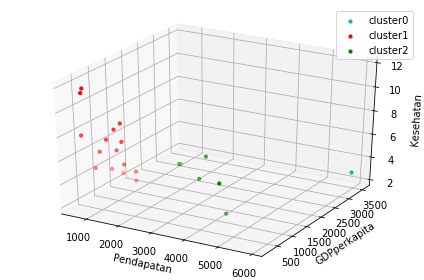

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
cluster_2_0 = cluster_2.query('cluster==0')
cluster_2_1 = cluster_2.query('cluster==1')
cluster_2_2 = cluster_2.query('cluster==2')
plt_0 = ax.scatter(cluster_2_0['Pendapatan'], cluster_2_0['GDPperkapita'], cluster_2_0['Kesehatan'], c='c', s=10, label='cluster0')
plt_1 = ax.scatter(cluster_2_1['Pendapatan'], cluster_2_1['GDPperkapita'], cluster_2_1['Kesehatan'], c='r', s=10, label='cluster1')
plt_2 = ax.scatter(cluster_2_2['Pendapatan'], cluster_2_2['GDPperkapita'], cluster_2_2['Kesehatan'], c='g', s=10, label='cluster2')
ax.set_xlabel('Pendapatan')
ax.set_ylabel('GDPperkapita')
ax.set_zlabel('Kesehatan')
ax.legend()
plt.tight_layout()
plt.show()

In [20]:
print(cluster_2_0.sort_values(['Pendapatan','GDPperkapita','Kesehatan'],ascending=True))

   Negara  Kematian_anak  Ekspor  Kesehatan  Impor  Pendapatan  Inflasi  \
3  Angola          119.0    62.3       2.85   42.9      5900.0     22.4   

   Harapan_hidup  Jumlah_fertiliti  GDPperkapita  cluster  
3           60.1              6.16        3530.0        0  


# Berdasarkan hasil clustering Negara yang harus dibantu adalah data yang terdapat dalam daftar seperti: Rep. Congo, Bolivia, Guyana, Bhutan, Nambia dan Turkemistan #